In [1]:
import numpy as np
import pandas as pd
import warnings 
warnings.simplefilter("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df["Outcome"].unique()

array([1, 0], dtype=int64)

In [5]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
continuos = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
discrete_catogorical = ['Outcome']
discrete_count = ['Pregnancies']

# Exploratory Data Analysis(**EDA**)

In [8]:
df[continuos].describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [9]:
df[continuos].corr()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Glucose,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


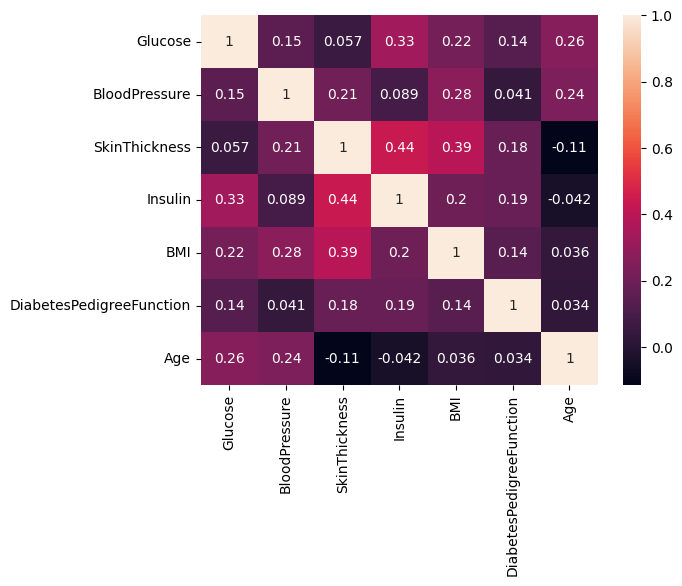

In [30]:
sns.heatmap(df[continuos].corr(),annot=True)
plt.show()

In [11]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
# Data wrangling no need here

In [14]:
# x & y
x = df.drop(columns="Outcome")  # x = df.drop("Outcome",axis=1)  
y =df["Outcome"] 

In [15]:
train_acc = []
cv = []
test_acc = []

for i in range(0,100):
    
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=i)
    
    from sklearn.linear_model import LogisticRegression
    model=LogisticRegression()
    model.fit(x_train,y_train)

    ypred_train = model.predict(x_train)
    ypred_test = model.predict(x_test)
    
    from sklearn.model_selection import cross_val_score
    cv.append(cross_val_score(model,x_train,y_train,cv=5).mean())
    
    from sklearn.metrics import accuracy_score
    train_acc.append(accuracy_score(y_train,ypred_train))
    test_acc.append(accuracy_score(y_test,ypred_test))
    
em =pd.DataFrame({"train_acc":train_acc,"cv":cv,"test_acc":test_acc})

# for best random state number...just check train == cv or not

gm = em[(abs(em["test_acc"]-em["cv"])<=0.05)]
# it retains rows where the difference between training R-squared and CV R-squared is within 0.05.
# Difference b/w train and cv must be less than 0.05 itself

rs=gm[gm["test_acc"]==gm["test_acc"].max()].index.tolist()[0] 
# filters the rows of the DataFrame gm to include only those rows where "test_acc" equals the maximum "test_acc" value.# 

pd.set_option("display.max_rows",None)
gm

,train_acc,cv,test_acc
1,0.783388,0.768746,0.779221
2,0.776873,0.747688,0.766234
3,0.788274,0.773557,0.740260
4,0.770358,0.760576,0.805195
5,0.785016,0.750873,0.785714
6,0.778502,0.760616,0.779221
7,0.778502,0.781701,0.792208
8,0.775244,0.765480,0.772727
9,0.796417,0.780088,0.766234
10,0.771987,0.767146,0.766234


In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=28)

In [17]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [18]:
print("intercept ",lr.intercept_)
print("co-eficient",lr.coef_)

intercept  [-8.0053696]
co-eficient [[ 1.00543830e-01  3.26614739e-02 -1.12934725e-02 -1.08476849e-03
  -4.97095671e-04  7.94517259e-02  8.05190432e-01  2.27513318e-02]]


# Evaluation

In [19]:
ypred_train = lr.predict(x_train) # ypred_train = lr.predict_proba(x_train) for logistic regression probability values need...for sigmoid curve representation, becoz
ypred_train                            # with regresion line we can touch more points than sigmoid curve


array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,

In [20]:
# df=pd.set_option('display.max_rows',None)

In [21]:
ypred_train.shape

(614,)

In [22]:
ypred_train = lr.predict(x_train)
ypred_test = lr.predict(x_test)

from sklearn.metrics import accuracy_score
print("Train Accuracy : ",accuracy_score(y_train,ypred_train))

from sklearn.model_selection import cross_val_score
print("CV Sore : ",cross_val_score(lr,x_train,y_train,cv=5).mean())

from sklearn.metrics import accuracy_score
print("Test Accuracy : ",accuracy_score(y_test,ypred_test))

Train Accuracy :  0.7671009771986971
CV Sore :  0.7638411302145808
Test Accuracy :  0.8116883116883117


In [24]:
""" Train Accuracy :  0.7768729641693811
CV Sore :  0.7492069838731175
Test Accuracy :  0.8181818181818182   """

' Train Accuracy :  0.7768729641693811\nCV Sore :  0.7492069838731175\nTest Accuracy :  0.8181818181818182   '

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,ypred_test)
cm

array([[93, 10],
       [19, 32]], dtype=int64)

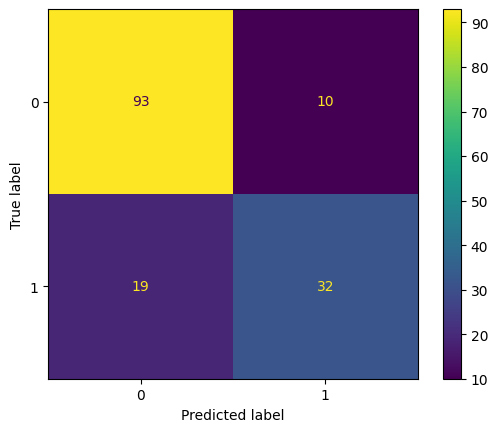

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm,display_labels=[0,1]).plot()
plt.show()

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87       103
           1       0.76      0.63      0.69        51

    accuracy                           0.81       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.81      0.81      0.81       154



# Influential records only applied on LINEAR REGRESSION